
Implement a Linear Support Vector Machine (SVM) using Stochastic Gradient descent (SGD) with L2 regularization(alpha value=0.001) from scratch by using only numpy on the https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html dataset.

You need to calculate Confusion Matrix , Precision,Recall,F1-score,ROC, AUC  graph....for the metric parts alone you can use sklearn.metrics or any library. 

Note:

1.The complete code should be well commented as .ipynb format. 

2.Exploratory data analysis is optional for the given data

3.Any extra findings/contributions from your side on the coding part will be appreciated

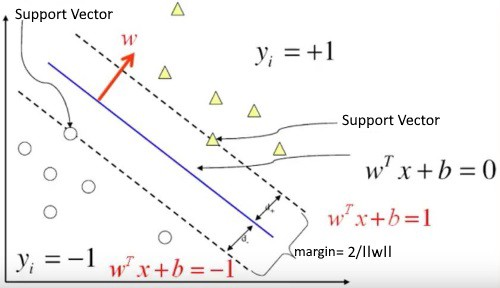




 SVM model f(x)

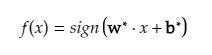


subject to 

> Minimize ∣∣w∣∣² which maximizes margin (2/∣∣w∣∣)

> Minimize the sum of hinge loss which minimizes misclassifications.

minimize the cost

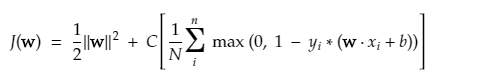

The Gradient of the Cost Function

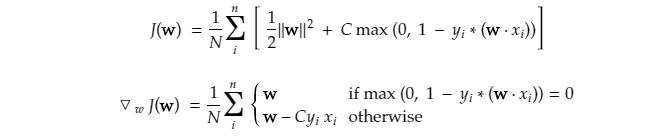

In [1]:
# import libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,confusion_matrix
from sklearn.utils import shuffle

In [2]:
def compute_cost(W, X, Y):
    # calculate hinge loss
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss = regularization_strength * (np.sum(distances) / N)

    # calculate cost
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost

In [3]:
def calculate_cost_gradient(W, X_batch, Y_batch):    
    if type(Y_batch) == np.float64:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])  

    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))

    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (regularization_strength * Y_batch[ind] * X_batch[ind])
        dw += di

    dw = dw/len(Y_batch)  # average
    return dw

In [4]:
def sgd(features, outputs):
    max_epochs = 5000
    weights = np.zeros(features.shape[1])
    nth = 0
    prev_cost = float("inf")
    cost_threshold = 0.01  # in percent
    # stochastic gradient descent
    for epoch in range(1, max_epochs):
        # shuffle to prevent repeating update cycles
        X, Y = shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent = calculate_cost_gradient(weights, x, Y[ind])
            weights = weights - (learning_rate * ascent)

        # convergence check on 2^nth epoch
        if epoch == 2 ** nth or epoch == max_epochs - 1:
            cost = compute_cost(weights, features, outputs)
            print("Epoch is: {} and Cost is: {}".format(epoch, cost))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights
            prev_cost = cost
            nth += 1
    return weights

In [5]:
def init():
    print("reading dataset...")
    # read data in pandas (pd) data frame
    data = pd.read_csv('data.csv')

    # drop last column (extra column added by pd)
    # and unnecessary first column (id)
    data.drop(data.columns[[-1, 0]], axis=1, inplace=True)
 
    # convert categorical labels to numbers
    diag_map = {'M': 1.0, 'B': -1.0}
    data['diagnosis'] = data['diagnosis'].map(diag_map)

    # put features & outputs in different data frames
    Y = data.loc[:, 'diagnosis']
    X = data.iloc[:, 1:]

#     # normalize data for better convergence and to prevent overflow
#     X_normalized = MinMaxScaler().fit_transform(X.values)
#     X = pd.DataFrame(X_normalized)

    # insert 1 in every row for intercept b
    X.insert(loc=len(X.columns), column='intercept', value=1)

    # split data into train and test set
    X_train, X_test, y_train, y_test = train_test_split (X, Y, test_size=0.2, random_state= 9)

    # train the model
    print("training started...")
    W = sgd(X_train.to_numpy(), y_train.to_numpy())
    print("training finished...")
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    print("weights are: {}".format(W))

    # testing the model
    print("testing the model...")
    y_train_predicted = np.array([])
    for i in range(X_train.shape[0]):
        yp = np.sign(np.dot(X_train.to_numpy()[i], W))
        y_train_predicted = np.append(y_train_predicted, yp)

    y_test_predicted = np.array([])
    for i in range(X_test.shape[0]):
        yp = np.sign(np.dot(X_test.to_numpy()[i], W))
        y_test_predicted = np.append(y_test_predicted, yp)
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    print("accuracy on test dataset: ",(accuracy_score(y_test, y_test_predicted)))
    print("precision on test dataset: ",(precision_score(y_test, y_test_predicted)))
    print("recall on test dataset: ",(recall_score(y_test, y_test_predicted)))
    print("f1 score on test dataset: ",(f1_score(y_test, y_test_predicted)))
    print("confusion matrix on test dataset: \n ",(confusion_matrix(y_test, y_test_predicted)))

# calling main function

In [6]:
# set hyper-parameters and call init
regularization_strength = 1000
learning_rate = 0.001
init()

reading dataset...
training started...
Epoch is: 1 and Cost is: 42410603.47422542
Epoch is: 2 and Cost is: 45266023.84191558
Epoch is: 4 and Cost is: 52306430.86234659
Epoch is: 8 and Cost is: 175644817.82013157
Epoch is: 16 and Cost is: 40713139.5815152
Epoch is: 32 and Cost is: 28387513.083434686
Epoch is: 64 and Cost is: 528838868.717855
Epoch is: 128 and Cost is: 37190609.05030066
Epoch is: 256 and Cost is: 36693207.944092244
Epoch is: 512 and Cost is: 36869973.43528453
training finished...
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
weights are: [-5.97237310e+02 -1.02905119e+03 -3.58175419e+03 -2.64019966e+03
 -6.08563619e+00 -7.14014746e-01  5.85861044e+00  2.74093059e+00
 -1.15740291e+01 -4.58962284e+00 -3.06760490e+00 -8.35675206e+01
  3.80167626e+00  1.44371530e+03 -4.38634213e-01 -3.54389315e-01
 -3.40678335e-01 -2.84894047e-01 -1.15253277e+00 -1.66326693e-01
 -6.01776051e+02 -1.33150429e+03 -3.53793519e+03  2.87391157e+03
 -7.7465

In [8]:
# sklearn SVM module built in with SGD

from sklearn.linear_model import SGDClassifier
df = pd.read_csv('data.csv')
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)
diag_map = {'M': 1.0, 'B': -1.0}
df['diagnosis'] = df['diagnosis'].map(diag_map)
y = df.loc[:, 'diagnosis']
X = df.iloc[:, 1:]
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)

clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X, y)

print("accuracy on test dataset: ",accuracy_score(y_test, clf.predict(X_test)))      
print('precision on test dataset:', precision_score(y_test,clf.predict(X_test)))
print('recall on test dataset: ',recall_score(y_test,clf.predict(X_test)))
print('f1 score on test dataset: ',f1_score(y_test,clf.predict(X_test)))
print("confusion matrix on test dataset: \n ",confusion_matrix(y_test, clf.predict(X_test)))


accuracy on test dataset:  0.9473684210526315
precision on test dataset: 0.921875
recall on test dataset:  0.9365079365079365
f1 score on test dataset:  0.9291338582677166
confusion matrix on test dataset: 
  [[103   5]
 [  4  59]]


In [9]:
clf.coef_

array([[-1.82310082e+03, -1.75257220e+03, -1.00686728e+04,
        -3.27895576e+03, -1.32401748e+01,  2.31461993e+01,
         5.46008741e+01,  2.24199079e+01, -2.47363416e+01,
        -1.15258284e+01, -4.48177899e+00, -8.68974662e+01,
         1.30365956e+02,  4.14859252e+03, -4.81666765e-01,
         6.49659205e+00,  9.61417961e+00,  1.92846140e+00,
        -1.34599256e+00,  2.69569901e-01, -1.92091194e+03,
        -1.89145355e+03, -9.68373989e+03,  5.03963145e+03,
        -1.47052035e+01,  8.44888548e+01,  1.35090933e+02,
         3.31400886e+01, -2.59037269e+01, -6.48502746e+00]])

In [10]:
clf.intercept_ 

array([-1320.41117552])

In [11]:
# sklearn SVM module

from sklearn import svm
df = pd.read_csv('data.csv')
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)
diag_map = {'M': 1.0, 'B': -1.0}
df['diagnosis'] = df['diagnosis'].map(diag_map)

y = df.loc[:, 'diagnosis']
X = df.iloc[:, 1:]
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

clf = svm.SVC()
clf.fit(X, y)

print("accuracy on test dataset: ",accuracy_score(y_test, clf.predict(X_test)))      
print('precision on test dataset:', precision_score(y_test,clf.predict(X_test)))
print('recall on test dataset: ',recall_score(y_test,clf.predict(X_test)))
print('f1 score on test dataset: ',f1_score(y_test,clf.predict(X_test)))
print("confusion matrix on test dataset: \n",confusion_matrix(y_test, clf.predict(X_test)))

accuracy on test dataset:  0.9473684210526315
precision on test dataset: 1.0
recall on test dataset:  0.8604651162790697
f1 score on test dataset:  0.9249999999999999
confusion matrix on test dataset: 
 [[71  0]
 [ 6 37]]
